## SVM Exercise

In [85]:
# import pandas
import pandas as pd
import numpy as np
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(font_scale=1.2)
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix

%matplotlib inline

# Pickle package
import pickle

In [4]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"

# Assign colum names to the dataset
colnames = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'Class']

# Read dataset to pandas dataframe
irisdata = pd.read_csv(url, names=colnames)

In [6]:
irisdata

,sepal-length,sepal-width,petal-length,petal-width,Class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


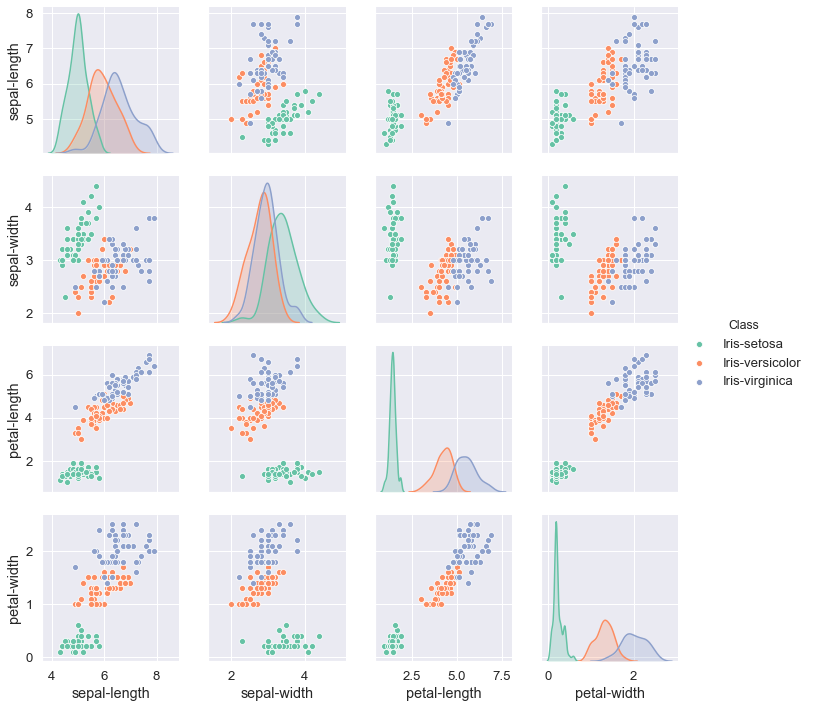

In [22]:
sns.pairplot(data=irisdata, hue='Class', palette='Set2')

* create X, y

In [25]:
x=irisdata.iloc[:,:-1]
y=irisdata.iloc[:,4]


0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
Name: Class, Length: 150, dtype: object

* import train_test_split and split data

In [29]:
x_train,x_test, y_train, y_test=train_test_split(x,y,test_size=0.30)

In [60]:
sc = StandardScaler()

# Compute the mean and standard deviation based on the training data
sc.fit(x_train)

# Scale the training data to be of mean 0 and of unit variance
X_train_std = sc.transform(x_train)

# Scale the test data to be of mean 0 and of unit variance
X_test_std = sc.transform(x_test)

* import SVC from sklearn and use Polynomial kernel

In [38]:
poly_model= SVC(kernel='poly')

* fit training data

In [39]:
poly_model.fit(x_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='poly', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

* predict X_test

In [65]:
poly_pred=poly_model.predict(x_test)
poly_acc=metrics.accuracy_score(y_test, poly_pred)
print("Accuracy:",poly_acc)


Accuracy: 0.9333333333333333


* import confusion matrix from sklearn and print values

In [89]:

confusion_matrix = metrics.confusion_matrix(y_test, poly_pred)
matrix_df = pd.DataFrame(confusion_matrix)


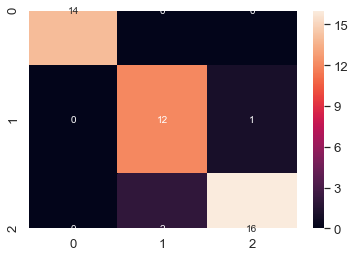

In [90]:
poly_c = sns.heatmap(matrix_df,annot=True)

* create SVC with rbf kernel

In [44]:
rbf_model= SVC()


* fit training data

In [45]:
rbf_model.fit(x_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

* predict X_test

In [82]:
rbf_pred = rbf_model.predict(x_test)

rbf_acc=metrics.accuracy_score(y_test, rbf_pred)
print("Rbf Accuracy:",rbf_acc)

Rbf Accuracy: 0.9777777777777777


* print confusion matrix

In [51]:
print(confusion_matrix(y_test,rbf_pred))

[[14  0  0]
 [ 0 12  1]
 [ 0  0 18]]


* create SVC with sigmoid kernel

In [53]:
sigmoid_model = SVC(kernel="sigmoid")

* fit training data

In [54]:
sigmoid_model.fit(x_train,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='sigmoid', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

* predict X_test

In [83]:
sig_pred = sigmoid_model.predict(x_test)
sig_acc=metrics.accuracy_score(y_test, sig_pred)
print("Sig Accuracy:",rbf_acc)

Sig Accuracy: 0.9777777777777777


In [84]:
print(confusion_matrix(y_test,sig_pred))

[[ 0 14  0]
 [ 0 13  0]
 [ 0 18  0]]


#### Q: Which kernel was the most accurate on the testing set?